In [1]:
import locator
from locator import Locator, plot_predictions, plot_error_summary

In [2]:
# set up locator config
locator = Locator(
    {
        "out": "holdout_example",
        "sample_data": "../data/test_sample_data.txt",
        "vcf": "../data/test_genotypes.vcf.gz",
        "train_split": 0.9,
        "batch_size": 64,
        "keras_verbose": 0,
    }
)
# Load and sort data
genotypes, samples = locator.load_genotypes(
    vcf="../data/test_genotypes.vcf.gz",
    # zarr="data/test_genotypes.zarr",
)
print(f"Genotypes-- {genotypes.shape[1]} individuals, {genotypes.shape[0]} variants")
print(f"Samples-- {samples.shape[0]} individuals")


No GPU devices available. Running on CPU.
reading VCF


[read_vcf] 11527 rows in 0.23s; chunk in 0.23s (49745 rows/s)
[read_vcf] all done (49678 rows/s)


Genotypes-- 500 individuals, 11527 variants
Samples-- 500 individuals


In [3]:
# do jacknife
all_predictions = locator.run_jacknife(genotypes, samples, return_df=True)

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'sample_weights'

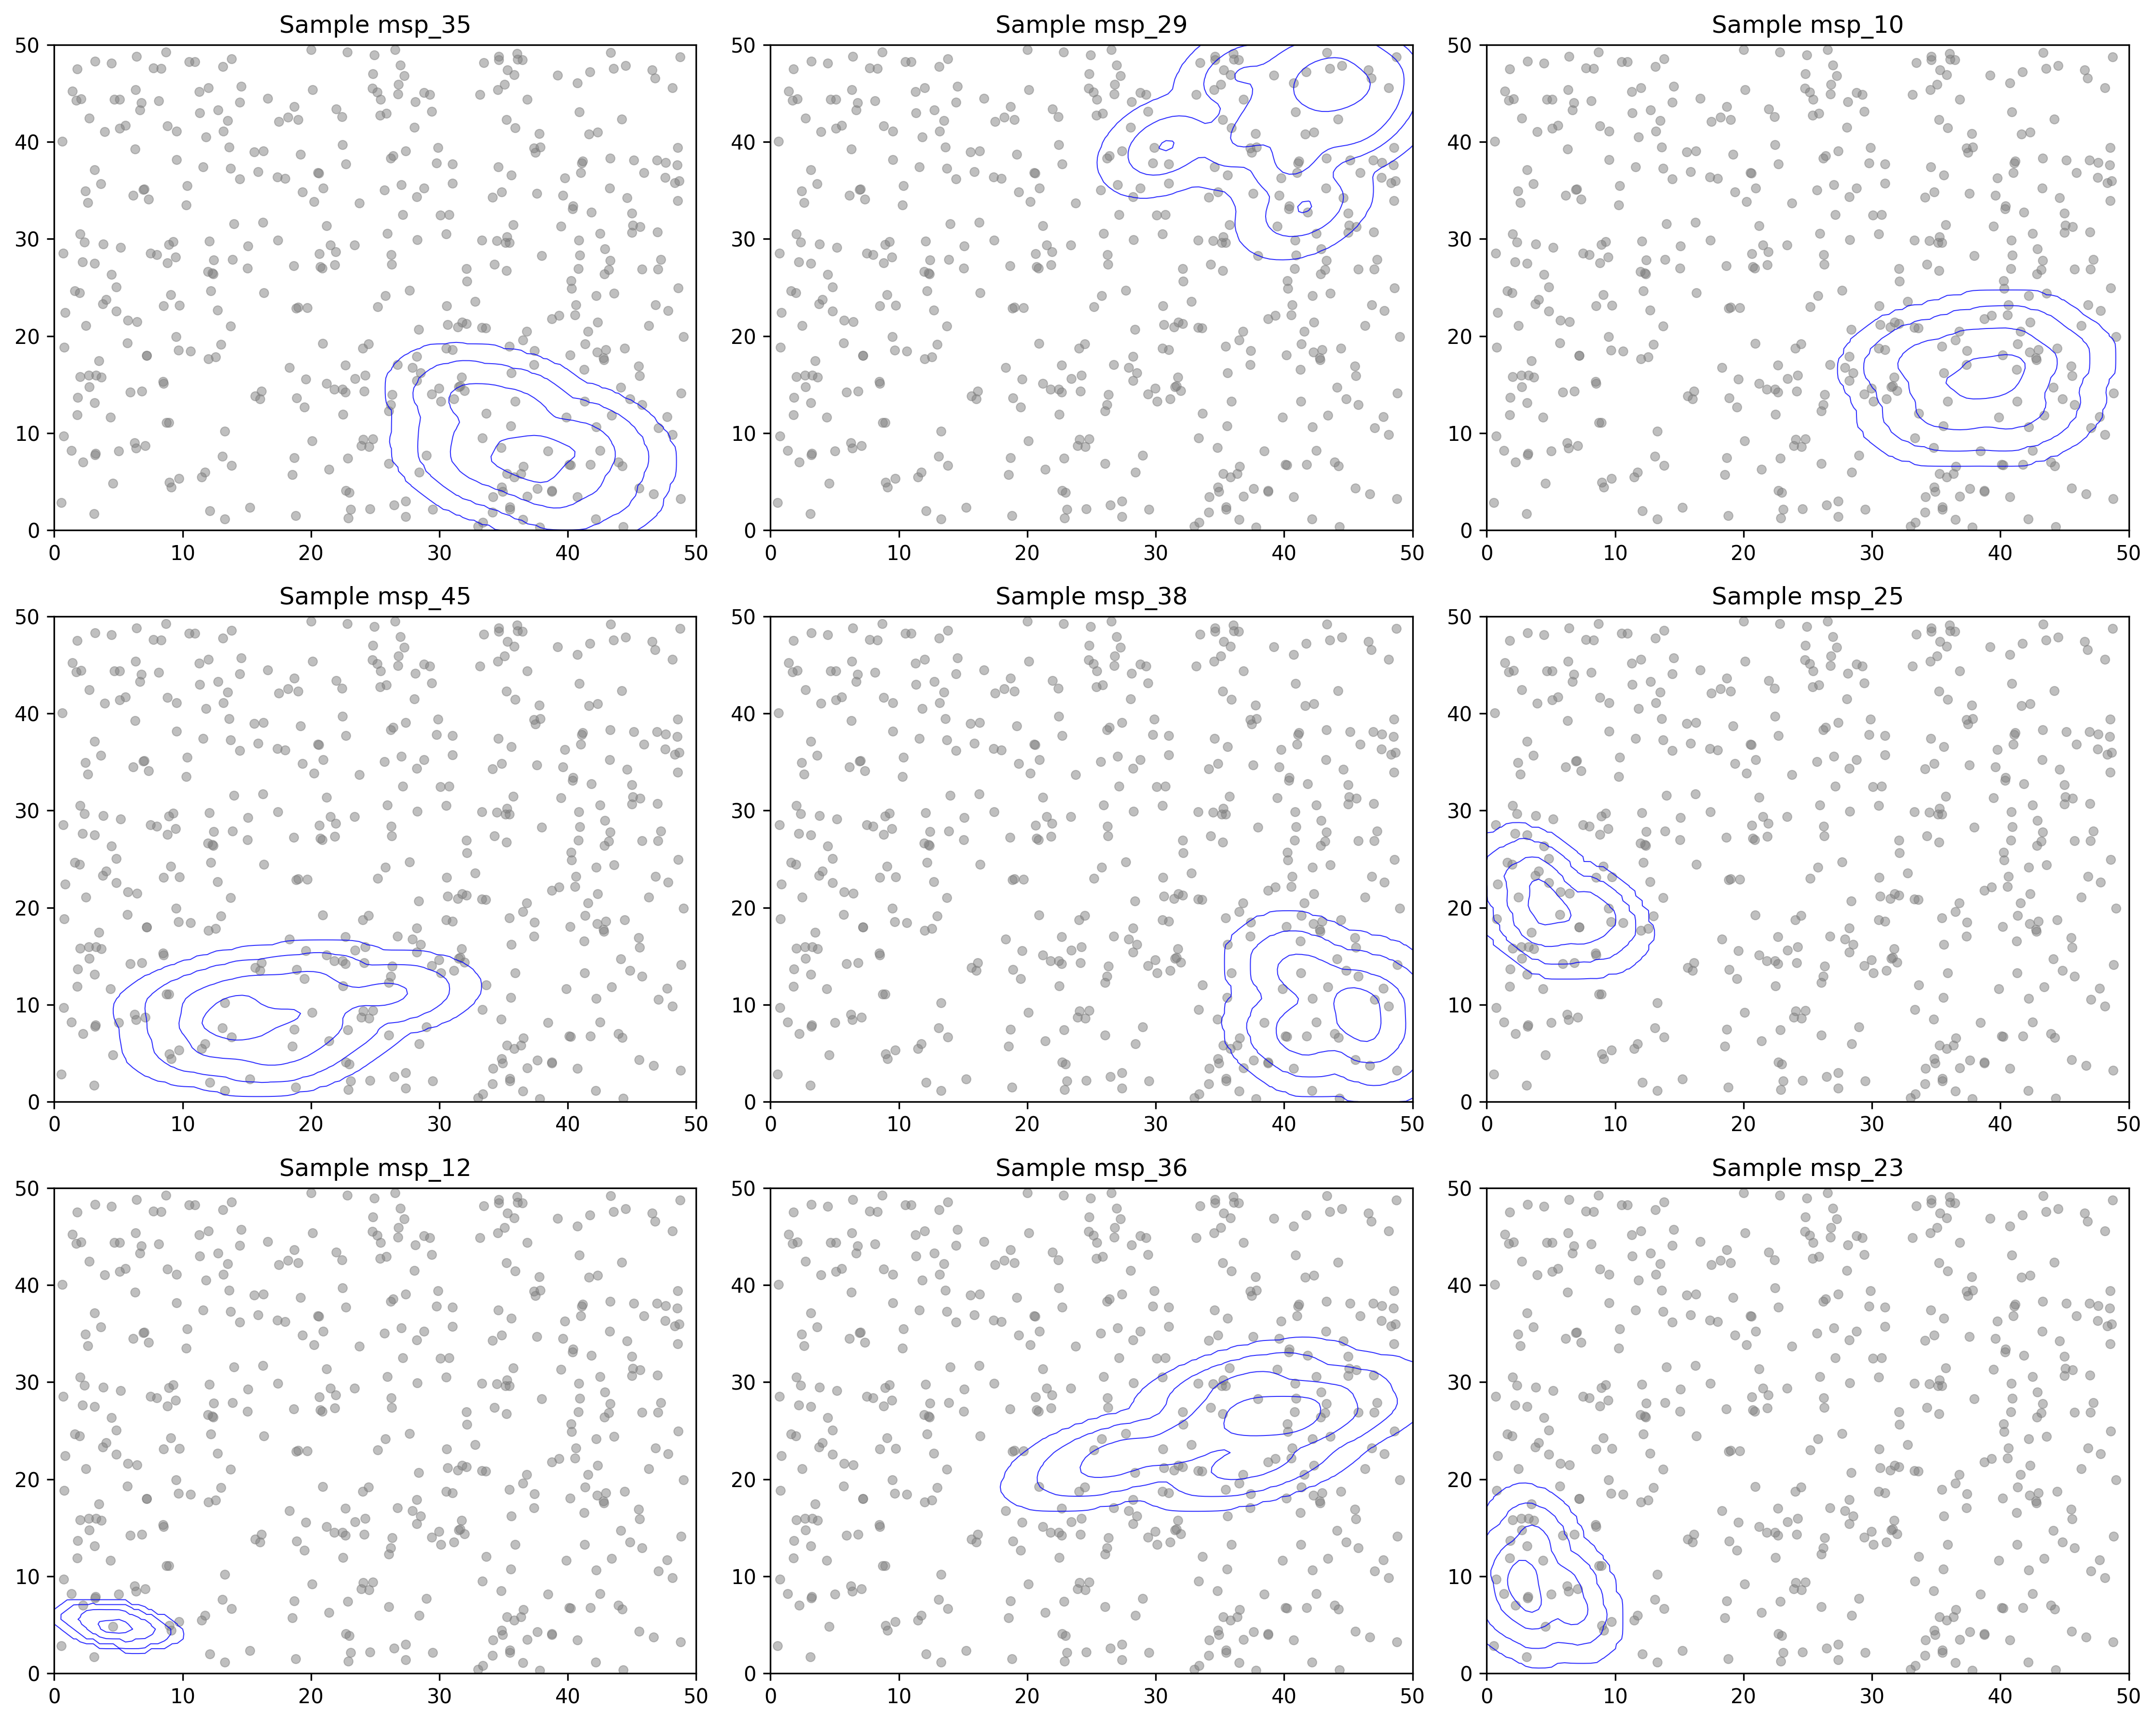

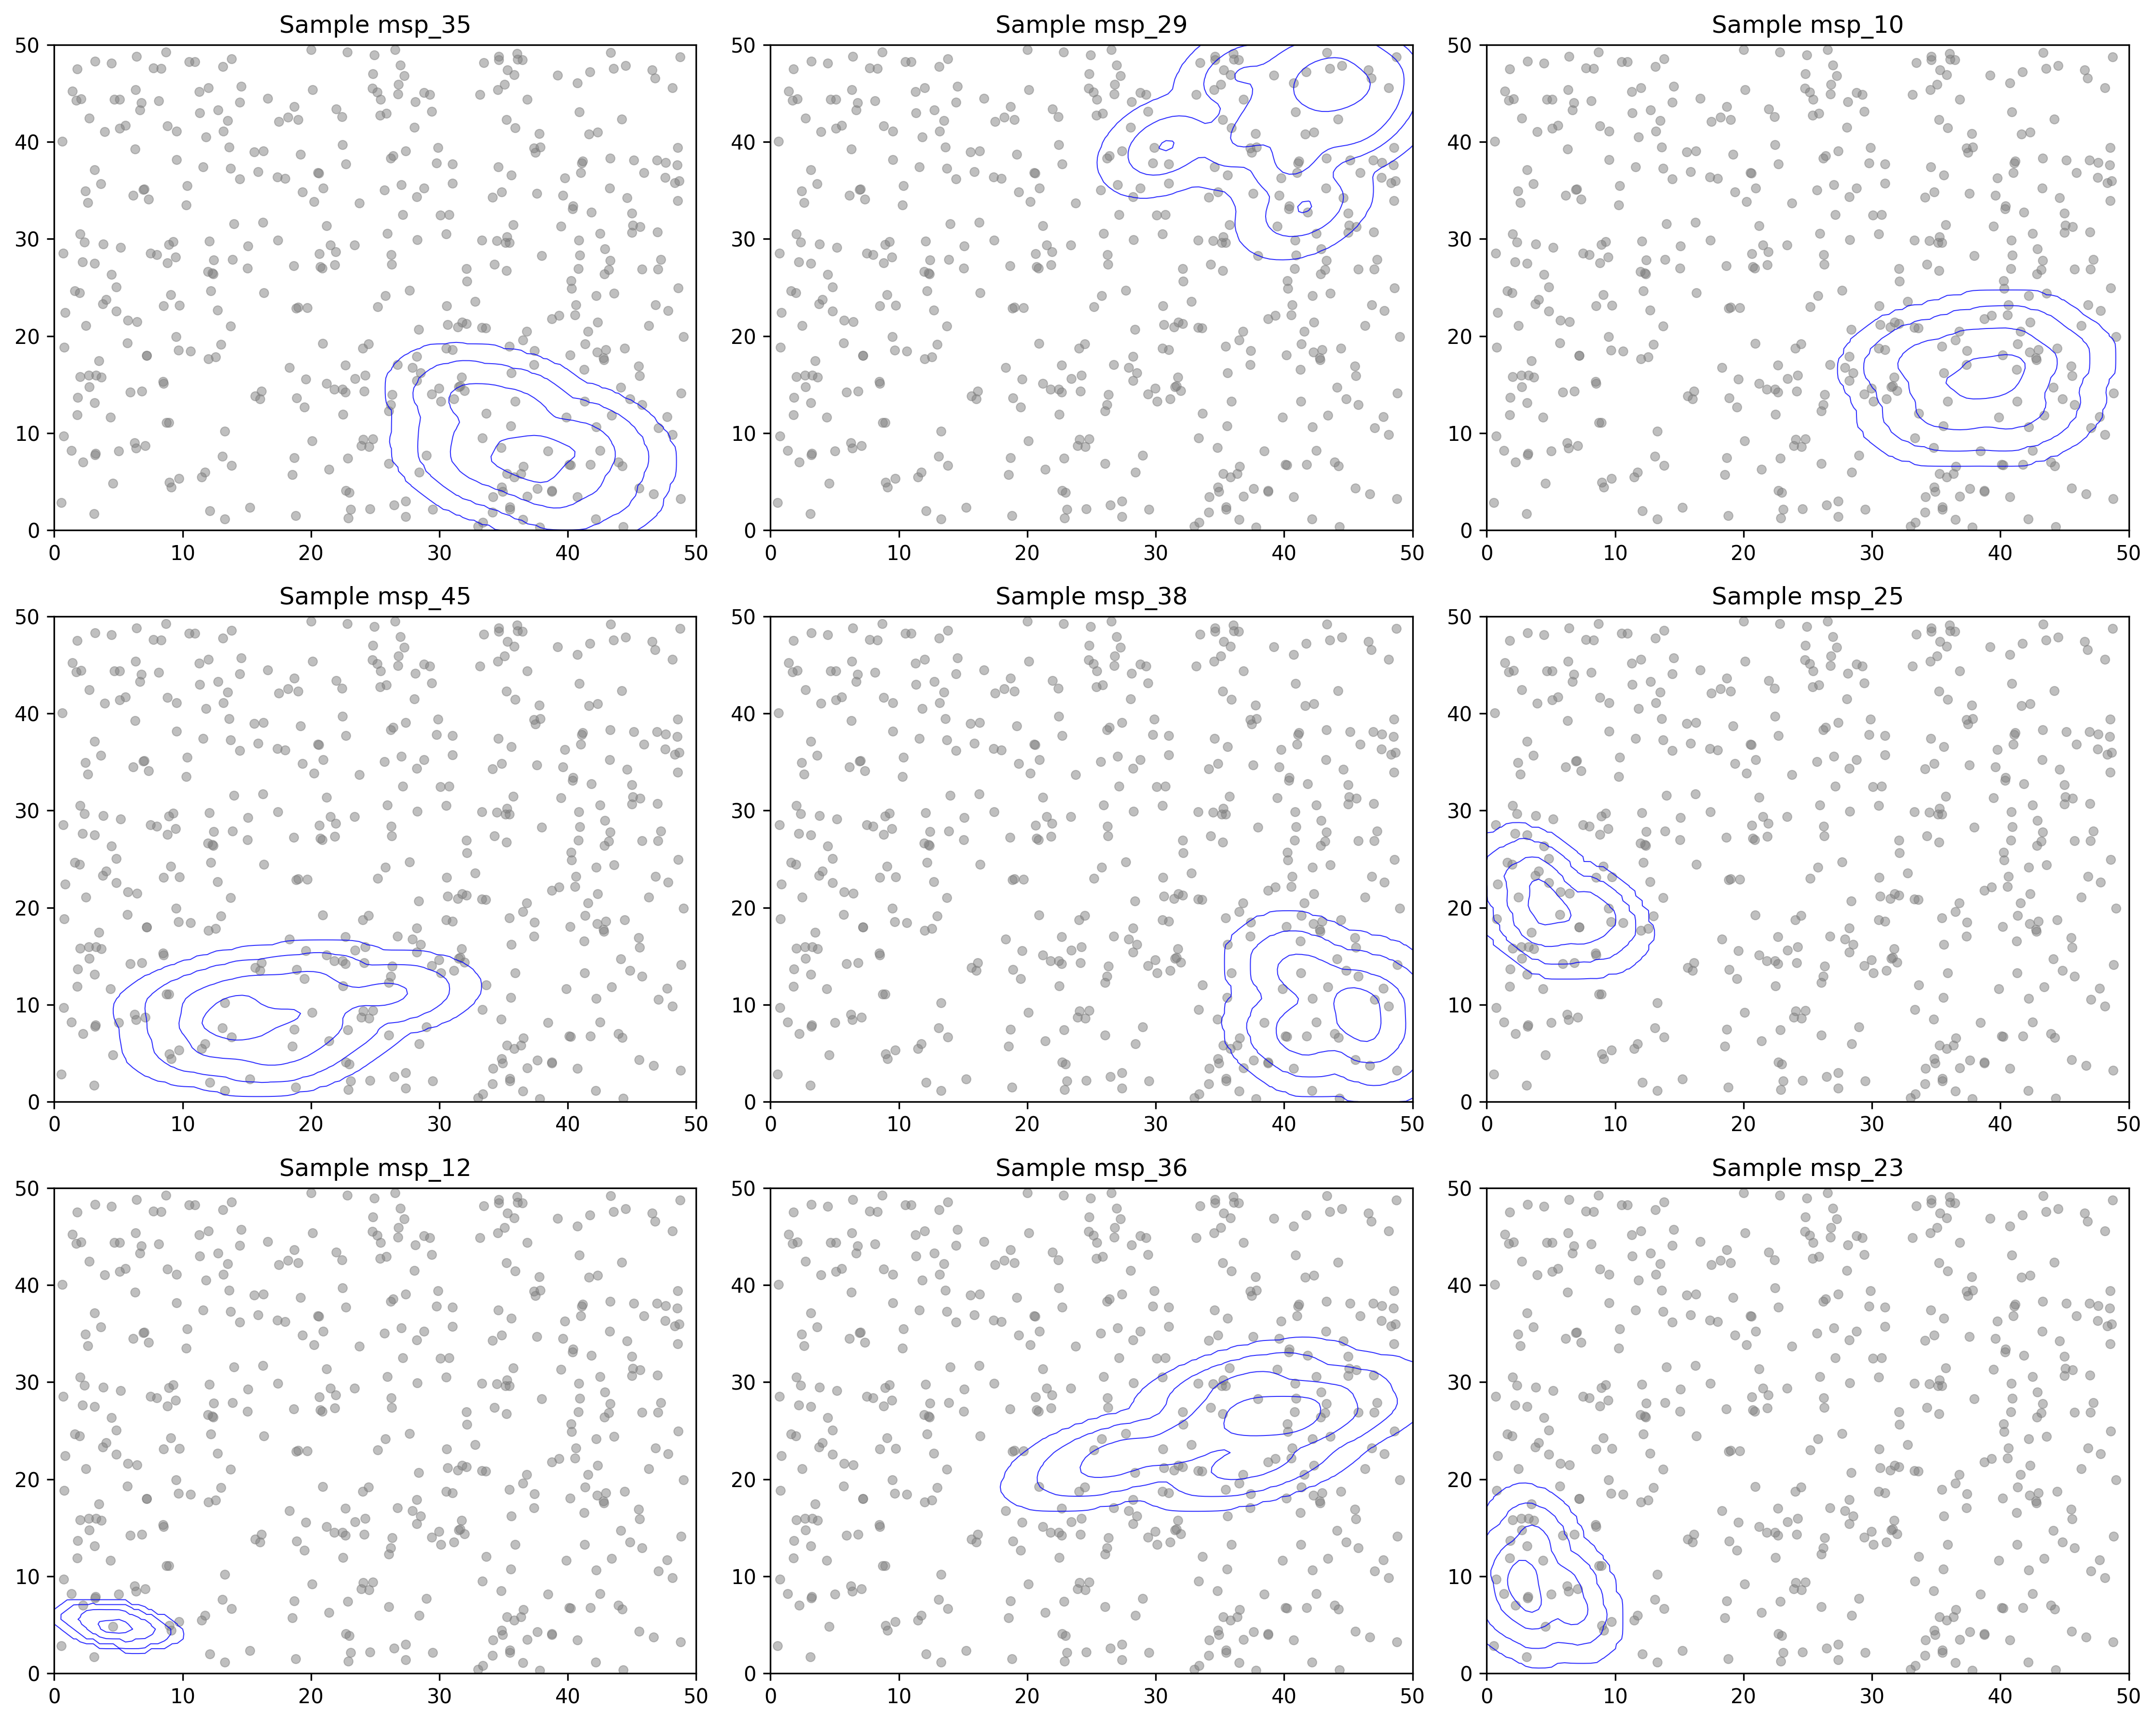

In [ ]:
plot_predictions(
    predictions=all_predictions, 
    locator=locator,
    out_prefix="jacknife_example"
)

In [ ]:
locator.train_holdout(genotypes, samples, k=10)


Predicting locations for holdout samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


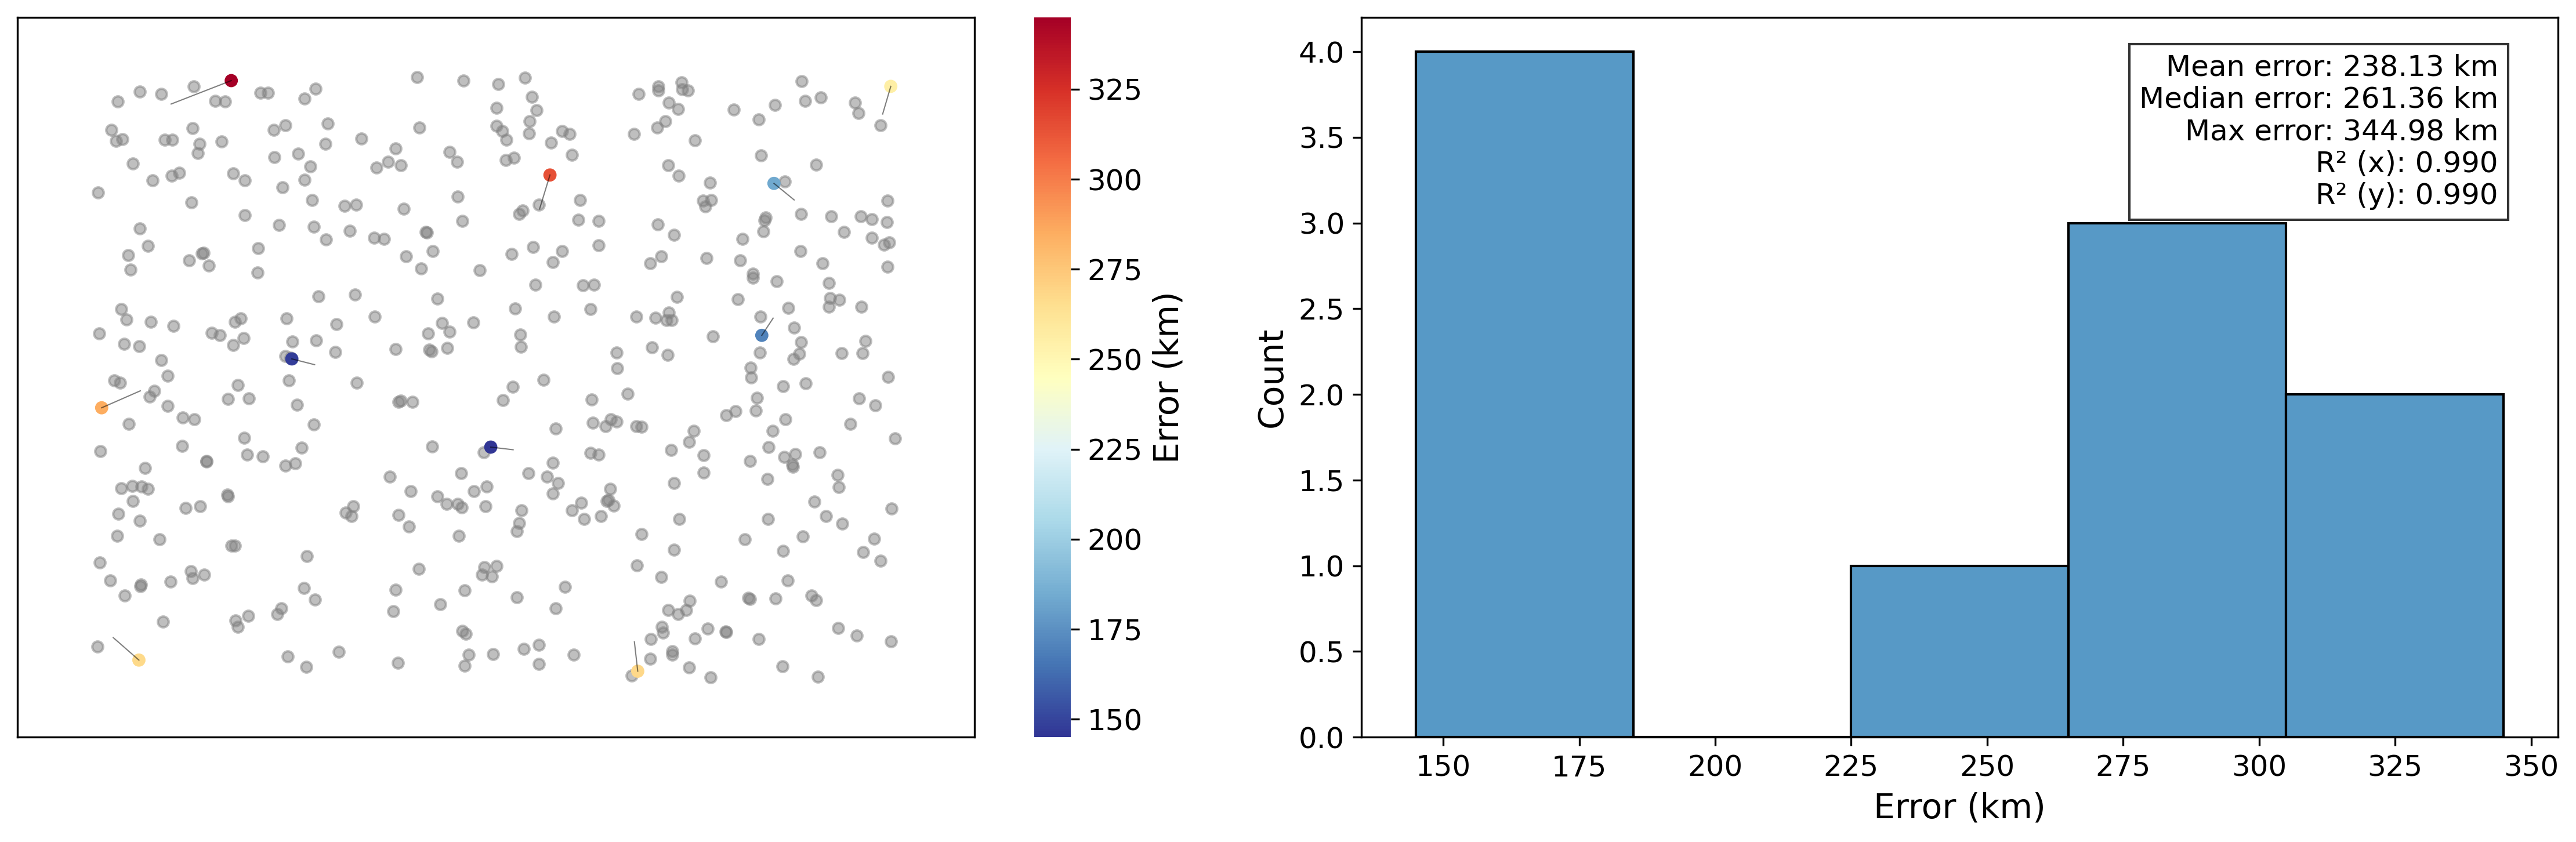

In [ ]:

predictions = locator.predict_holdout(return_df=True, plot_map=False)


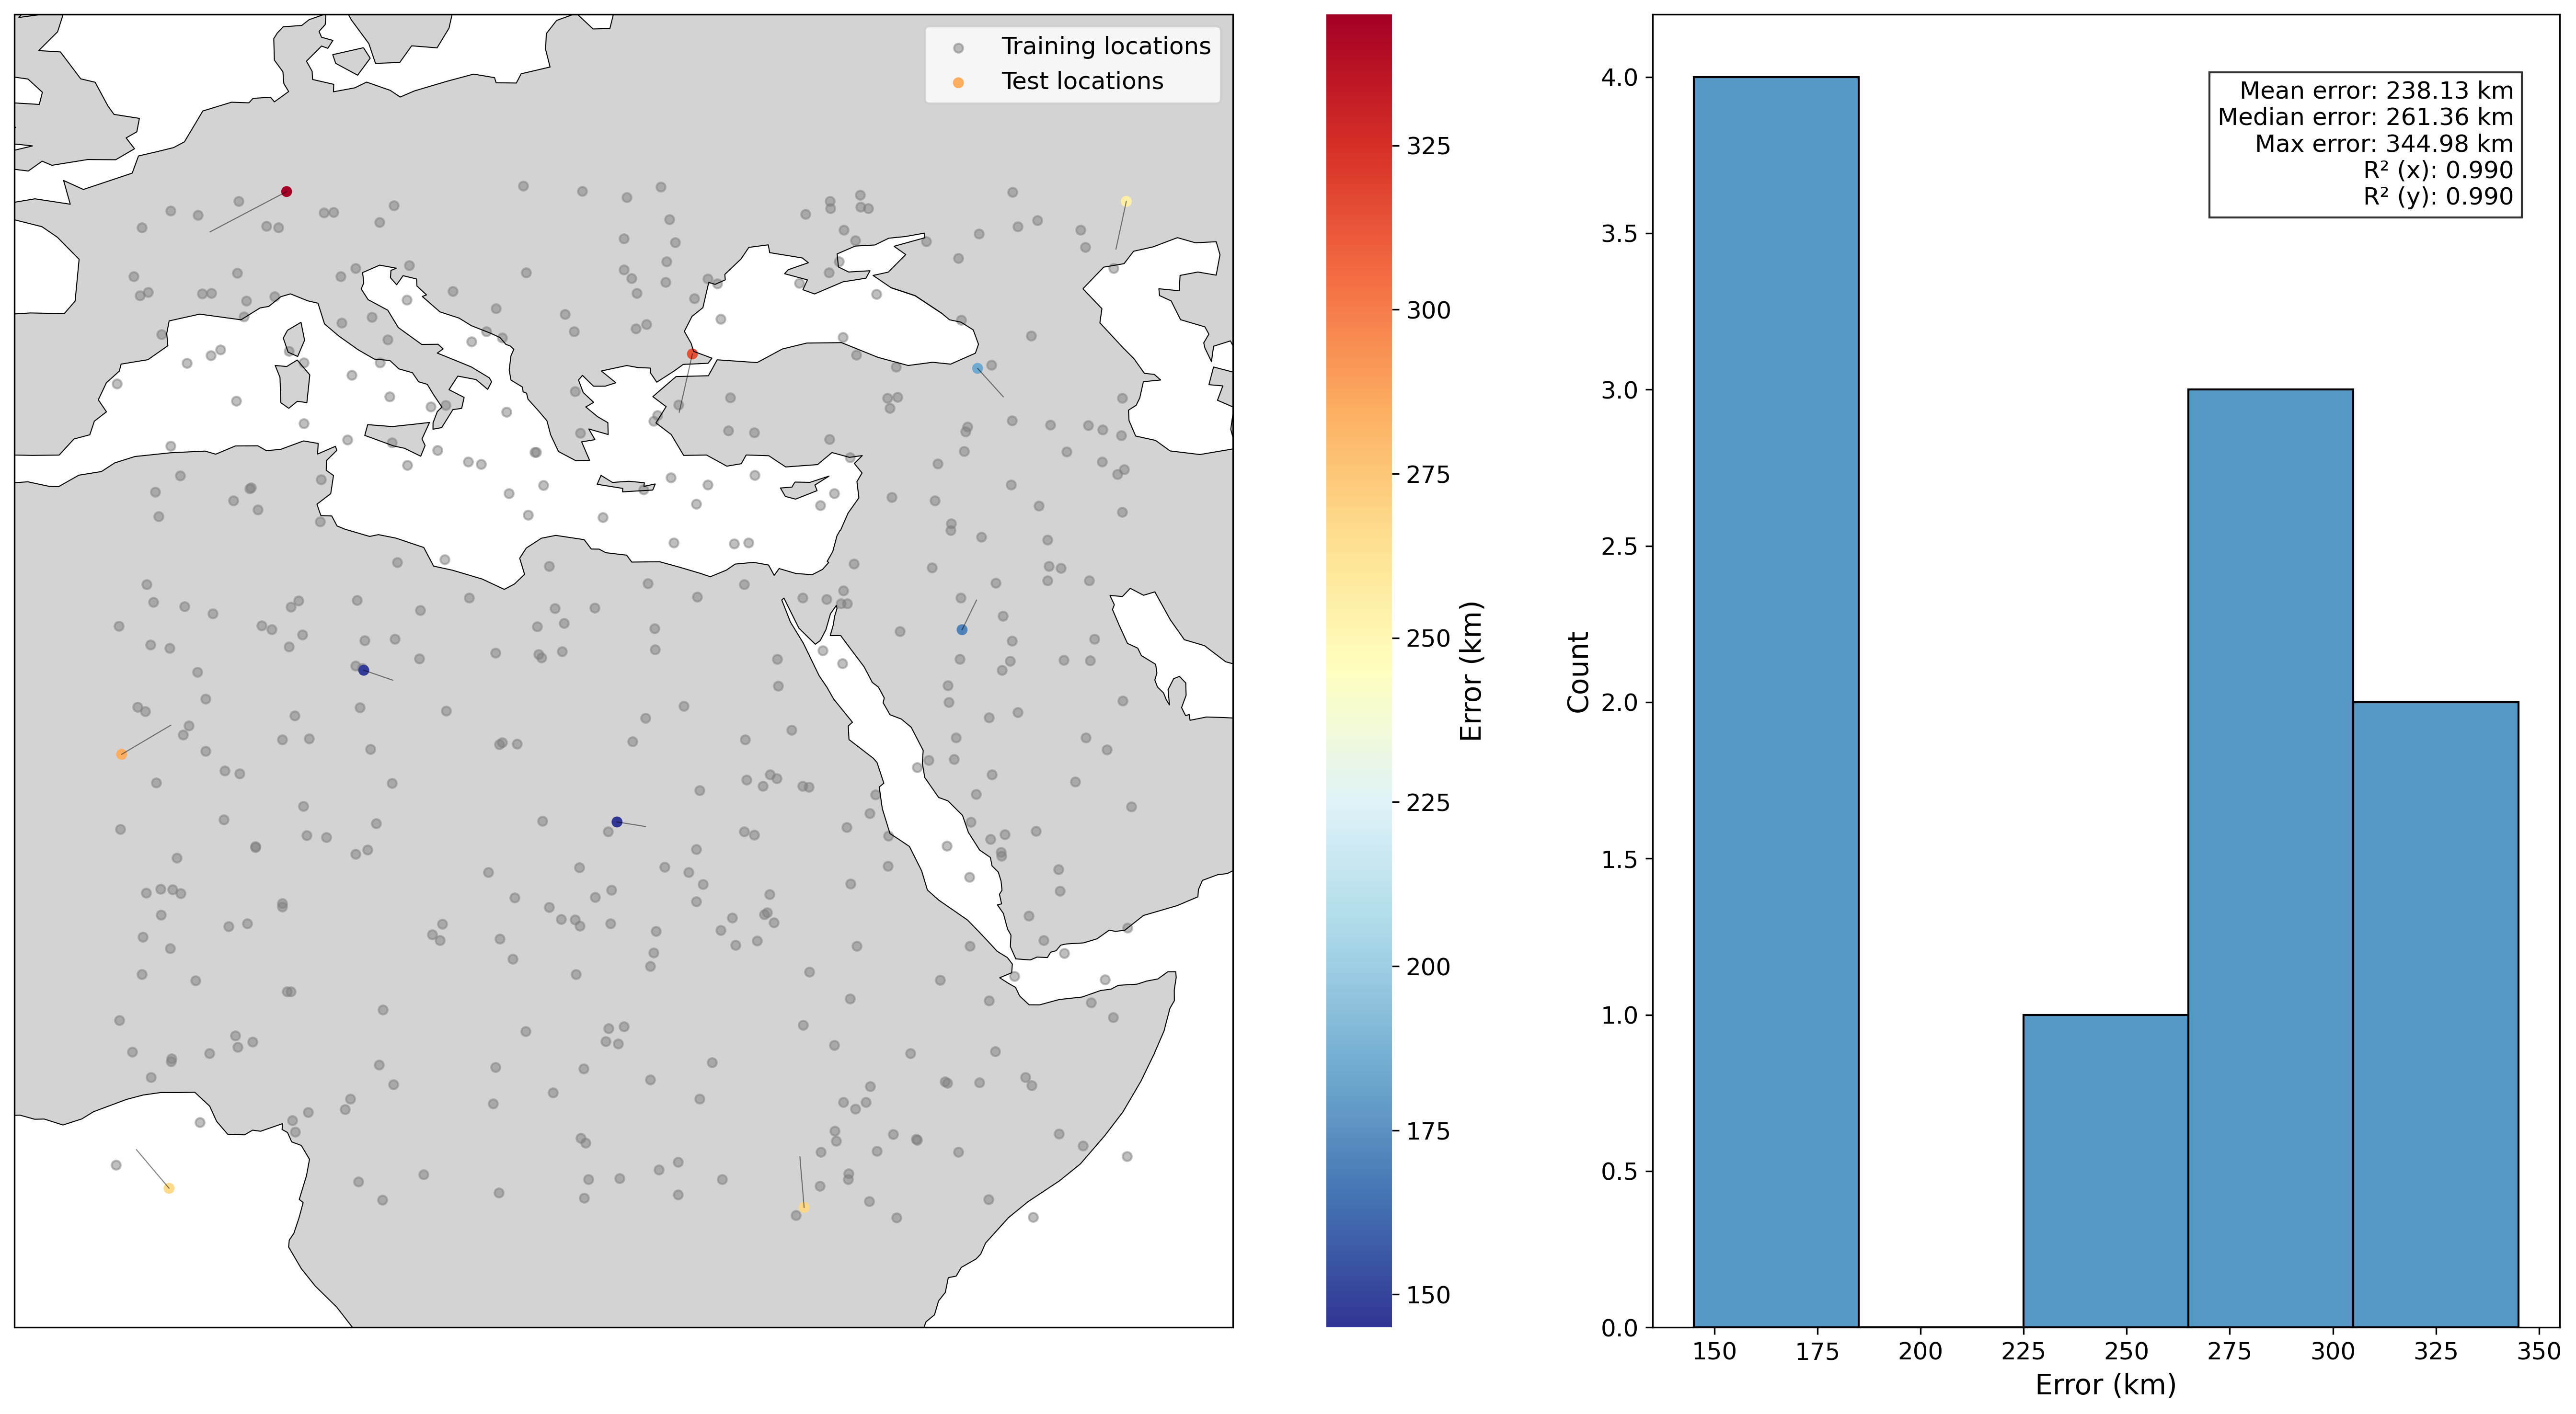

In [ ]:
plot_error_summary(
    predictions=predictions,
    sample_data="../data/test_sample_data.txt",
    plot_map=False,
    include_training_locs=True,
)


In [ ]:
predictions = locator.run_holdouts(genotypes, samples, k=100, return_df=True)

Running 5 iterations, holding out 100 samples at a time


  0%|          | 0/5 [00:00<?, ?it/s]

filtering SNPs
running on 5830 genotypes after filtering





/Users/adk/miniforge3/envs/locator/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Predicting locations for holdout samples...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 20%|██        | 1/5 [00:19<01:17, 19.50s/it]/Users/adk/miniforge3/envs/locator/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


filtering SNPs
running on 5830 genotypes after filtering



Predicting locations for holdout samples...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 40%|████      | 2/5 [00:38<00:56, 18.97s/it]/Users/adk/miniforge3/envs/locator/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


filtering SNPs
running on 5830 genotypes after filtering



Predicting locations for holdout samples...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 60%|██████    | 3/5 [01:00<00:41, 20.55s/it]/Users/adk/miniforge3/envs/locator/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


filtering SNPs
running on 5830 genotypes after filtering



Predicting locations for holdout samples...
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


 80%|████████  | 4/5 [01:21<00:20, 20.74s/it]/Users/adk/miniforge3/envs/locator/lib/python3.11/site-packages/keras/src/layers/normalization/batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


filtering SNPs
running on 5830 genotypes after filtering



Predicting locations for holdout samples...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


100%|██████████| 5/5 [01:41<00:00, 20.26s/it]


In [ ]:
predictions

x          y sampleID     x_pred     y_pred
0   3.183136  23.787834  msp_423   3.183136  23.787834
1  41.610458  29.755035  msp_156  41.610458  29.755035
2  48.259815  46.504463  msp_265  48.259815  46.504463
3  13.765414  25.934664  msp_498  13.765414  25.934664
4   5.053740  47.326271  msp_159   5.053740  47.326271
5  27.428288  38.717007  msp_448  27.428288  38.717007
6  42.886147  39.455513  msp_445  42.886147  39.455513
7   1.540152   3.533266  msp_234   1.540152   3.533266
8  25.821375  18.953060   msp_64  25.821375  18.953060
9  33.184689   3.190298  msp_141  33.184689   3.190298

In [ ]:
# Plot error summary
plot_error_summary(
    predictions=predictions,
    sample_data="../data/test_sample_data.txt",  # or DataFrame
    plot_map=False,
    include_training_locs=True,
)


AttributeError: 'str' object has no attribute 'empty'

In [ ]:
# Run jacknife holdouts
predictions = locator.run_jacknife_holdouts(
    genotypes=genotypes,
    samples=samples,
    k=10,  # or specify holdout_indices
    jacknife_prop=0.05,
    n_replicates=10,
    return_df=True,
)

AttributeError: module 'locator' has no attribute 'run_jacknife_holdouts'